In [2]:
import pandas as pd
import numpy as np
import io # If you are not using Google Colab, you can skip the sentence containing 'import io'
import statsmodels.api as sm

#We will actually be importing more libraries later. 
#That is unconventional for coding, but done for ease of explination.

In [3]:
merged = pd.read_excel('/content/udemy trial.xlsx', sheet_name='new_formulation')
merged

,person_id,procedure_date,procedure_concept_id,concept_name,amount,total_paid,provider_id,provider_name,category according to process mining,category according to domain expert
0,92293702,2020-10-17,H21-3289-04102-01,MIKOSTAT_100000 IU/ml_Oral Suspension_30ml Gla...,1,0.00,16537,1,PHARMA,Drugs
1,88837756,2020-01-11,G93-0590-04632-01,BETASEPT_1 %_Mouth Wash_130ml,1,18.72,33780,3,PHARMA,Drugs
2,88837756,2020-01-11,G93-0590-04632-01,BETASEPT_1 %_Mouth Wash_130ml,1,18.72,33780,3,PHARMA,Drugs
3,88837756,2020-01-11,G93-0590-04632-01,BETASEPT_1 %_Mouth Wash_130ml,1,18.72,33780,3,PHARMA,Drugs
4,88837756,2020-01-11,G93-0590-04632-01,BETASEPT_1 %_Mouth Wash_130ml,1,18.72,33780,3,PHARMA,Drugs
...,...,...,...,...,...,...,...,...,...,...
99995,94612948,2021-04-04,A4649,Surgical supplies,1,0.00,19434,1,MEDICAL,HCPCS
99996,94612948,2021-04-04,A4649,Surgical supplies,1,0.00,19434,1,MEDICAL,HCPCS
99997,94612948,2021-04-04,A4649,Surgical supplies,1,0.00,19434,1,MEDICAL,HCPCS
99998,94612948,2021-04-04,A4649,Surgical supplies,1,0.00,19434,1,MEDICAL,HCPCS


In [4]:
pivot = pd.pivot_table(merged, values = 'amount', index=['person_id'], columns = 'category according to process mining',aggfunc=np.sum).reset_index()

In [5]:
pivot

category according to process mining,person_id,LAB,MEDICAL,PER DIEM,PHARMA,RAD
0,86931962,NaN,6.0,NaN,NaN,NaN
1,87190962,NaN,NaN,10.0,40.0,NaN
2,87254649,NaN,NaN,NaN,2.0,NaN
3,87255108,NaN,8.0,NaN,NaN,NaN
4,87263335,NaN,2.0,NaN,NaN,NaN
...,...,...,...,...,...,...
7365,115263814,NaN,1.0,NaN,NaN,NaN
7366,115269285,NaN,1.0,NaN,NaN,NaN
7367,115269317,NaN,NaN,NaN,27.0,NaN
7368,115269846,11.0,NaN,NaN,3.0,NaN


In [6]:
raw_data = pivot.fillna(0)

In [7]:
raw_data

category according to process mining,person_id,LAB,MEDICAL,PER DIEM,PHARMA,RAD
0,86931962,0.0,6.0,0.0,0.0,0.0
1,87190962,0.0,0.0,10.0,40.0,0.0
2,87254649,0.0,0.0,0.0,2.0,0.0
3,87255108,0.0,8.0,0.0,0.0,0.0
4,87263335,0.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...
7365,115263814,0.0,1.0,0.0,0.0,0.0
7366,115269285,0.0,1.0,0.0,0.0,0.0
7367,115269317,0.0,0.0,0.0,27.0,0.0
7368,115269846,11.0,0.0,0.0,3.0,0.0


In [8]:
dataset = raw_data.iloc[:,1:] 
#Note that now we are not making a distinction between input and target columns.
#We are simply removing the column containing the person_id because it has no quantifyable meaning.

In [9]:
dataset

category according to process mining,LAB,MEDICAL,PER DIEM,PHARMA,RAD
0,0.0,6.0,0.0,0.0,0.0
1,0.0,0.0,10.0,40.0,0.0
2,0.0,0.0,0.0,2.0,0.0
3,0.0,8.0,0.0,0.0,0.0
4,0.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...
7365,0.0,1.0,0.0,0.0,0.0
7366,0.0,1.0,0.0,0.0,0.0
7367,0.0,0.0,0.0,27.0,0.0
7368,11.0,0.0,0.0,3.0,0.0


In [10]:
from sklearn import preprocessing 

# As mentioned in the introduction of this coding script,
# it is convential to import all libraries at the beginning of a script.
# Instead, we are putting it here, because that follows the sequence of explination of this lecture.

data_scaled = preprocessing.scale(dataset)
#Scaling our data will make it more suitable for machine learning.

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) 
principalComponents = pca.fit_transform(data_scaled)

#We are transforming our scaled input data to two principal components

In [12]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf

#We create this Dataframe so we can add the PCA metrics to our original dataset.

,principal component 1,principal component 2
0,-0.239598,-0.034601
1,0.493674,1.472294
2,-0.257083,-0.139111
3,-0.229017,-0.001486
4,-0.260758,-0.100832
...,...,...
7365,-0.266049,-0.117390
7366,-0.266049,-0.117390
7367,-0.078886,-0.203652
7368,0.731872,-0.382492


In [13]:
pca.explained_variance_ratio_

array([0.34688447, 0.23975354])

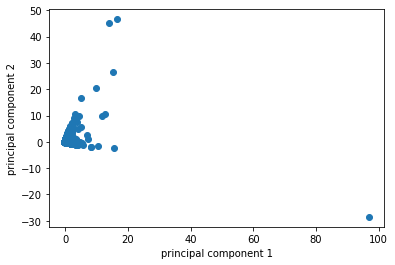

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline 
#If you are not using Google Colab, this line is not needed.
plt.scatter(principalComponents[:,0],principalComponents[:,1])
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.show()

In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(4)
kmeans.fit(principalComponents)
clusters_new = principalDf.copy()
clusters_new['cluster_pred'] = kmeans.fit_predict(principalComponents)

Text(0, 0.5, 'principal component 2')

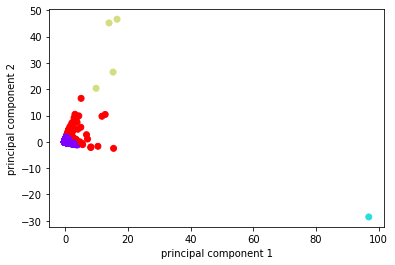

In [16]:
plt.scatter(clusters_new['principal component 1'],clusters_new['principal component 2'], c=clusters_new['cluster_pred']
,cmap='rainbow')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')

In [17]:
import plotly.express as px

# Create a scatter plot using Plotly Express
fig = px.scatter(clusters_new, x='principal component 1', y='principal component 2', color='cluster_pred',
                 color_continuous_scale=px.colors.sequential.Rainbow)

# Show the plot
fig.show()

In [18]:
identified_clusters = kmeans.fit_predict(data_scaled) 
data_with_clusters = raw_data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters


category according to process mining,person_id,LAB,MEDICAL,PER DIEM,PHARMA,RAD,Cluster
0,86931962,0.0,6.0,0.0,0.0,0.0,0
1,87190962,0.0,0.0,10.0,40.0,0.0,0
2,87254649,0.0,0.0,0.0,2.0,0.0,0
3,87255108,0.0,8.0,0.0,0.0,0.0,0
4,87263335,0.0,2.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...
7365,115263814,0.0,1.0,0.0,0.0,0.0,0
7366,115269285,0.0,1.0,0.0,0.0,0.0,0
7367,115269317,0.0,0.0,0.0,27.0,0.0,0
7368,115269846,11.0,0.0,0.0,3.0,0.0,0


In [19]:
X_dist = kmeans.transform(data_scaled)**2
alldistances = kmeans.fit_transform(data_scaled)
totalDistance = np.min(alldistances, axis=1).round(2)
data_with_distance = data_with_clusters.copy()
data_with_distance['Distance_from_nearest_cluster'] = totalDistance
data_with_distance

category according to process mining,person_id,LAB,MEDICAL,PER DIEM,PHARMA,RAD,Cluster,Distance_from_nearest_cluster
0,86931962,0.0,6.0,0.0,0.0,0.0,0,0.28
1,87190962,0.0,0.0,10.0,40.0,0.0,0,2.77
2,87254649,0.0,0.0,0.0,2.0,0.0,0,0.31
3,87255108,0.0,8.0,0.0,0.0,0.0,0,0.28
4,87263335,0.0,2.0,0.0,0.0,0.0,0,0.29
...,...,...,...,...,...,...,...,...
7365,115263814,0.0,1.0,0.0,0.0,0.0,0,0.30
7366,115269285,0.0,1.0,0.0,0.0,0.0,0,0.30
7367,115269317,0.0,0.0,0.0,27.0,0.0,0,0.40
7368,115269846,11.0,0.0,0.0,3.0,0.0,0,1.20


In [20]:
PCA_kmeans = pd.concat([data_with_distance, principalDf], axis=1)
PCA_kmeans

,person_id,LAB,MEDICAL,PER DIEM,PHARMA,RAD,Cluster,Distance_from_nearest_cluster,principal component 1,principal component 2
0,86931962,0.0,6.0,0.0,0.0,0.0,0,0.28,-0.239598,-0.034601
1,87190962,0.0,0.0,10.0,40.0,0.0,0,2.77,0.493674,1.472294
2,87254649,0.0,0.0,0.0,2.0,0.0,0,0.31,-0.257083,-0.139111
3,87255108,0.0,8.0,0.0,0.0,0.0,0,0.28,-0.229017,-0.001486
4,87263335,0.0,2.0,0.0,0.0,0.0,0,0.29,-0.260758,-0.100832
...,...,...,...,...,...,...,...,...,...,...
7365,115263814,0.0,1.0,0.0,0.0,0.0,0,0.30,-0.266049,-0.117390
7366,115269285,0.0,1.0,0.0,0.0,0.0,0,0.30,-0.266049,-0.117390
7367,115269317,0.0,0.0,0.0,27.0,0.0,0,0.40,-0.078886,-0.203652
7368,115269846,11.0,0.0,0.0,3.0,0.0,0,1.20,0.731872,-0.382492


In [21]:
PCA_kmeans.columns

Index(['person_id', 'LAB', 'MEDICAL', 'PER DIEM', 'PHARMA', 'RAD', 'Cluster',
       'Distance_from_nearest_cluster', 'principal component 1',
       'principal component 2'],
      dtype='object')

In [22]:
metrics_extracted = PCA_kmeans[['person_id','Cluster', 'Distance_from_nearest_cluster', 'principal component 1',
       'principal component 2' ]]
metrics_extracted

,person_id,Cluster,Distance_from_nearest_cluster,principal component 1,principal component 2
0,86931962,0,0.28,-0.239598,-0.034601
1,87190962,0,2.77,0.493674,1.472294
2,87254649,0,0.31,-0.257083,-0.139111
3,87255108,0,0.28,-0.229017,-0.001486
4,87263335,0,0.29,-0.260758,-0.100832
...,...,...,...,...,...
7365,115263814,0,0.30,-0.266049,-0.117390
7366,115269285,0,0.30,-0.266049,-0.117390
7367,115269317,0,0.40,-0.078886,-0.203652
7368,115269846,0,1.20,0.731872,-0.382492


In [23]:
Final_data = pd.merge(merged, metrics_extracted, on= 'person_id')
Final_data 

#Optionally, you can further clean the dataset and remove the duplicate columns.
#We did not do this in this lecture, because it is of no consequence to our analysis.

,person_id,procedure_date,procedure_concept_id,concept_name,amount,total_paid,provider_id,provider_name,category according to process mining,category according to domain expert,Cluster,Distance_from_nearest_cluster,principal component 1,principal component 2
0,92293702,2020-10-17,H21-3289-04102-01,MIKOSTAT_100000 IU/ml_Oral Suspension_30ml Gla...,1,0.0,16537,1,PHARMA,Drugs,1,0.00,96.847708,-28.541452
1,92293702,2020-09-27,B97-4883-05179-02,SODIUM CHLORIDE 0.9% INJECTION MINI BAG W/BUIL...,1,0.0,16537,1,PHARMA,Drugs,1,0.00,96.847708,-28.541452
2,92293702,2020-09-27,B97-4883-05179-02,SODIUM CHLORIDE 0.9% INJECTION MINI BAG W/BUIL...,1,0.0,16537,1,PHARMA,Drugs,1,0.00,96.847708,-28.541452
3,92293702,2020-09-27,B97-4883-05179-02,SODIUM CHLORIDE 0.9% INJECTION MINI BAG W/BUIL...,1,0.0,16537,1,PHARMA,Drugs,1,0.00,96.847708,-28.541452
4,92293702,2020-09-27,B97-4883-05179-02,SODIUM CHLORIDE 0.9% INJECTION MINI BAG W/BUIL...,1,0.0,16537,1,PHARMA,Drugs,1,0.00,96.847708,-28.541452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,102414343,2021-05-14,H21-4630-04167-01,RISEK_40 mg_Powder For Solution For Intravenou...,1,0.0,9500,9,PHARMA,Drugs,0,0.37,-0.114525,-0.190744
99996,102414343,2021-05-14,H21-4630-04167-01,RISEK_40 mg_Powder For Solution For Intravenou...,1,0.0,9500,9,PHARMA,Drugs,0,0.37,-0.114525,-0.190744
99997,102414343,2021-05-14,H21-4630-04167-01,RISEK_40 mg_Powder For Solution For Intravenou...,1,0.0,9500,9,PHARMA,Drugs,0,0.37,-0.114525,-0.190744
99998,102414343,2021-05-14,H21-4630-04167-01,RISEK_40 mg_Powder For Solution For Intravenou...,1,0.0,9500,9,PHARMA,Drugs,0,0.37,-0.114525,-0.190744


In [24]:
from google.colab import files
Final_data.to_csv('Udemy Example Mo Khadra.csv') 
files.download('Udemy Example Mo Khadra.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>